## Домашнее задание № 21
### Козел А.Г. 14.01.23

* ДЗ - построение ассоциативных правил для датасета :
Можно использовать например apriori, association_rules, fpgrowth из mlxtend.frequent_patterns (работают чуть быстрее)


https://www.kaggle.com/datasets/gorkhachatryan01/purchase-behaviour?select=dataset.csv

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

import networkx as nx


In [2]:
df= pd.read_csv('dataset.csv', header=None)

In [3]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,pork,sandwich bags,lunch meat,all- purpose,flour,soda,butter,vegetables,beef,aluminum foil,all- purpose,dinner rolls,shampoo,all- purpose
1,shampoo,hand soap,waffles,vegetables,cheeses,mixes,milk,sandwich bags,laundry detergent,dishwashing liquid/detergent,waffles,individual meals,hand soap,vegetables
2,pork,soap,ice cream,toilet paper,dinner rolls,hand soap,spaghetti sauce,milk,ketchup,sandwich loaves,poultry,toilet paper,ice cream,ketchup


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1499 non-null   object
 1   1       1499 non-null   object
 2   2       1499 non-null   object
 3   3       1499 non-null   object
 4   4       1499 non-null   object
 5   5       1448 non-null   object
 6   6       1411 non-null   object
 7   7       1356 non-null   object
 8   8       1300 non-null   object
 9   9       1241 non-null   object
 10  10      1203 non-null   object
 11  11      1156 non-null   object
 12  12      1103 non-null   object
 13  13      1044 non-null   object
dtypes: object(14)
memory usage: 164.1+ KB


Есть пропущенные значения, необходимо обработать пропуски

In [5]:
df = df.fillna (' ') #  NaN и пропуски заменяем пробелами 

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,pork,sandwich bags,lunch meat,all- purpose,flour,soda,butter,vegetables,beef,aluminum foil,all- purpose,dinner rolls,shampoo,all- purpose
1,shampoo,hand soap,waffles,vegetables,cheeses,mixes,milk,sandwich bags,laundry detergent,dishwashing liquid/detergent,waffles,individual meals,hand soap,vegetables
2,pork,soap,ice cream,toilet paper,dinner rolls,hand soap,spaghetti sauce,milk,ketchup,sandwich loaves,poultry,toilet paper,ice cream,ketchup
3,juice,lunch meat,soda,toilet paper,all- purpose,,,,,,,,,
4,pasta,tortillas,mixes,hand soap,toilet paper,vegetables,vegetables,paper towels,vegetables,flour,vegetables,pork,poultry,eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,beef,sandwich bags,hand soap,paper towels,paper towels,all- purpose,beef,fruits,coffee/tea,beef,shampoo,mixes,cheeses,juice
1495,dinner rolls,lunch meat,spaghetti sauce,pasta,vegetables,cereals,dinner rolls,soap,milk,eggs,poultry,cheeses,cereals,mixes
1496,lunch meat,eggs,poultry,vegetables,tortillas,beef,beef,individual meals,dishwashing liquid/detergent,shampoo,dishwashing liquid/detergent,dishwashing liquid/detergent,hand soap,sugar
1497,ketchup,milk,poultry,cheeses,soap,toilet paper,yogurt,beef,waffles,sugar,spaghetti sauce,all- purpose,sandwich bags,toilet paper


In [7]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [8]:
df.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [9]:
df_copy = df[df.columns].T.agg(','.join)
df_copy

0        pork, sandwich bags, lunch meat, all- purpose...
1        shampoo, hand soap, waffles, vegetables, chee...
2        pork, soap, ice cream, toilet paper, dinner r...
3        juice, lunch meat, soda, toilet paper, all- p...
4        pasta, tortillas, mixes, hand soap, toilet pa...
                              ...                        
1494     beef, sandwich bags, hand soap, paper towels,...
1495     dinner rolls, lunch meat, spaghetti sauce, pa...
1496     lunch meat, eggs, poultry, vegetables, tortil...
1497     ketchup, milk, poultry, cheeses, soap, toilet...
1498     laundry detergent, vegetables, shampoo, veget...
Length: 1499, dtype: object

In [10]:
df_copy=df_copy.to_frame()

In [11]:
df_new =df_copy.rename(columns={0: 'check'})

In [12]:
df_new.check=df_new.check.transform(lambda x: x.split(','))

In [13]:
df_new = df_new.check

In [14]:
df_new

0       [ pork,  sandwich bags,  lunch meat,  all- pur...
1       [ shampoo,  hand soap,  waffles,  vegetables, ...
2       [ pork,  soap,  ice cream,  toilet paper,  din...
3       [ juice,  lunch meat,  soda,  toilet paper,  a...
4       [ pasta,  tortillas,  mixes,  hand soap,  toil...
                              ...                        
1494    [ beef,  sandwich bags,  hand soap,  paper tow...
1495    [ dinner rolls,  lunch meat,  spaghetti sauce,...
1496    [ lunch meat,  eggs,  poultry,  vegetables,  t...
1497    [ ketchup,  milk,  poultry,  cheeses,  soap,  ...
1498    [ laundry detergent,  vegetables,  shampoo,  v...
Name: check, Length: 1499, dtype: object

Используя и TransactionEncoderобъект, мы можем преобразовать этот набор данных в формат массива, подходящий для типичных API-интерфейсов машинного обучения. С помощью  fit метода  TransactionEncoder узнает уникальные метки в наборе данных, а с помощью  transform метода преобразует входной набор данных (список списков Python) в логический массив NumPy с горячим кодированием:
http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/

In [15]:
te = TransactionEncoder()
te_ary = pd.DataFrame((te.fit(df_new).transform(df_new)), columns= te.columns_)
te_ary.head(3)



,,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,False,True,True,False,True,True,False,False,False,True,...,True,False,True,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,True,...,False,True,False,True,False,True,False,False,False,False


In [16]:
te_ary = te_ary.drop(' ' , axis=1) # убрала пустой столбец

In [17]:
te_ary.astype("int").head(3)

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,1,1,0,1,1,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0


## Алгоритм Apriori

* min_support: с плавающей запятой (по умолчанию: 0,5)

Число с плавающей точкой от 0 до 1 для минимальной поддержки возвращаемых наборов элементов. Поддержка рассчитывается как дробь transactions_where_item(s)_occur / total_transactions.

* use_colnames: bool (по умолчанию: False)

Если True, использует имена столбцов DataFrames в возвращаемом DataFrame вместо индексов столбцов.

* max_len: int (по умолчанию: нет)

Максимальная длина генерируемых наборов элементов. Если None(по умолчанию) оцениваются все возможные длины наборов элементов (при априорном условии).

* verbose: целое (по умолчанию: 0)

Показывает количество итераций, если >= 1 и low_memoryравно True. Если

=1 и low_memoryесть False, показывает количество комбинаций.

* low_memory: bool (по умолчанию: False)

Если True, использует итератор для поиска комбинаций выше min_support. Обратите внимание, что while low_memory=Trueследует использовать только для больших наборов данных, если ресурсы памяти ограничены, потому что эта реализация составляет прибл. В 3-6 раз медленнее, чем по умолчанию.

Алгоритм Apriori будет использоваться для генерации частых наборов элементов. Мы зададим минимальную поддержку в 0.01 в первом случае и в размере 6 из общего числа транзакций во втором. Генерируются правила ассоциаций, и мы отфильтровываем значения Lift > 1,4

In [18]:
%%time

result = apriori(te_ary, min_support = 0.01, use_colnames = True, max_len = 2)
rules = association_rules(result, metric ="lift", min_threshold = 1)
display(rules.head(5))
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( all- purpose),( bagels),0.263509,0.278185,0.075384,0.286076,1.028364,0.002079,1.011052
1,( bagels),( all- purpose),0.278185,0.263509,0.075384,0.270983,1.028364,0.002079,1.010252
2,( all- purpose),( dishwashing liquid/detergent),0.263509,0.268179,0.074049,0.281013,1.047856,0.003382,1.017850
3,( dishwashing liquid/detergent),( all- purpose),0.268179,0.263509,0.074049,0.276119,1.047856,0.003382,1.017421
4,( all- purpose),( eggs),0.263509,0.268846,0.071381,0.270886,1.007589,0.000538,1.002798


Rules identified:  660
CPU times: total: 31.2 ms
Wall time: 25.3 ms


In [19]:
%%time

apriori(te_ary, min_support=6/len(df_new), low_memory=True) #min_support  как в примере

CPU times: total: 1.36 s
Wall time: 1.36 s


,support,itemsets
0,0.263509,(0)
1,0.264176,(1)
2,0.278185,(2)
3,0.262842,(3)
4,0.261508,(4)
...,...,...
50894,0.004670,"(32, 33, 35, 37, 30)"
50895,0.006004,"(32, 33, 35, 36, 37)"
50896,0.004670,"(33, 2, 35, 37, 14, 20)"
50897,0.004670,"(35, 37, 6, 8, 11, 23)"


Алгоритм apriori от apyori https://habr.com/ru/company/ods/blog/353502/

<>:22: DeprecationWarning: invalid escape sequence \d
<>:22: DeprecationWarning: invalid escape sequence \d
C:\Users\37533\AppData\Local\Temp\ipykernel_10700\2374243876.py:22: DeprecationWarning: invalid escape sequence \d
  if re.compile("^[R]\d+$").fullmatch(node) != None:


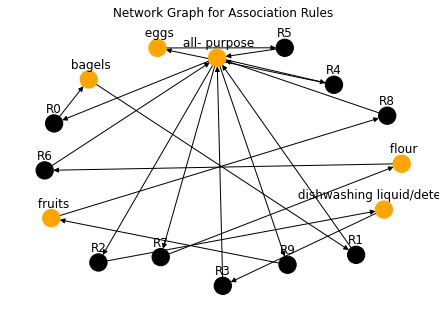

In [20]:
def draw_network(rules, rules_to_show):
    # Ориентированный граф от NetworkX
    network = nx.DiGraph()
  # Перебор количества правил для отображения
    for i in range(rules_to_show):
        # Добавление узла правила
        network.add_nodes_from(["R"+str(i)])
        for antecedents in rules.iloc[i]['antecedents']: 
            # Добавление узла-предшественника и ссылки на правило
            network.add_nodes_from([antecedents])
            network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
        for consequents in rules.iloc[i]['consequents']:
            # Добавление узла-последователя и ссылки на правило
            network.add_nodes_from([consequents])
            network.add_edge("R"+str(i), consequents,  weight = 2)

    color_map=[]  
  
  # Для каждого узла, если это правило, цвет черный, в противном случае - оранжевый.
    for node in network:
        if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
        else:
            color_map.append('orange')
  
  # Расположение узлов с помощью spring layout
    pos = nx.spring_layout(network, k=16, scale=1)
  # Построение сетевого графа
    nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Сдвиг расположения текста вверх
    for p in pos:  
        pos[p][1] += 0.12

    nx.draw_networkx_labels(network, pos)
    plt.title("Network Graph for Association Rules")
    plt.show()

draw_network(rules, 10)

Варианты что с чем лучше продается. Например , сахар

In [21]:
sugar_rules = rules[rules['consequents'].astype(str).str.contains('sugar')]
sugar_rules = sugar_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)

display(sugar_rules.head(5))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( hand soap),( sugar),0.237492,0.266845,0.070714,0.297753,1.115829,0.007340,1.044013
1,( yogurt),( sugar),0.268179,0.266845,0.078052,0.291045,1.090690,0.006490,1.034135
2,( soda),( sugar),0.274183,0.266845,0.078719,0.287105,1.075925,0.005555,1.028419
3,( flour),( sugar),0.257505,0.266845,0.072715,0.282383,1.058232,0.004001,1.021653
4,( lunch meat),( sugar),0.276184,0.266845,0.077385,0.280193,1.050024,0.003687,1.018545


https://habr.com/ru/company/ods/blog/353502/
* Первое понятие в ARL — support:
$supp(X) = \frac{\{t\in T;\ X \in t\}}{|T|}$, 
где X — itemset, содержащий в себе i-items, а T — количество транзакций.
* сonfidence (достоверность)- это показатель того, как часто наше правило срабатывает для всего датасета.

$conf(x_1\cup x_2) = \frac{supp(x_1 \cup x_2)}{supp(x_1)}$




Никода не думала, что с сахаром будет  лучше всего связано мыло для рук)

## Метод fpgrowth из mlxtend.frequent_patterns
http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/

In [22]:
from mlxtend.frequent_patterns import fpgrowth

* min_support: с плавающей запятой (по умолчанию: 0,5)

Число с плавающей точкой от 0 до 1 для минимальной поддержки возвращаемых наборов элементов. Поддержка рассчитывается как доля transaction_where_item(s)_occur / total_transactions.

* use_colnames: bool (по умолчанию: False)

Если true, использует имена столбцов DataFrames в возвращаемом DataFrame вместо индексов столбцов.

* max_len: int (по умолчанию: нет)

Максимальная длина генерируемых наборов элементов. Если None(по умолчанию) оцениваются все возможные длины наборов элементов.

* verbose: целое (по умолчанию: 0)

Показаны этапы генерации условного дерева.

Вернем предметы и наборы предметов с поддержкой не менее 27%:

In [23]:
%%time
fpgrowth(te_ary, min_support=0.27)

CPU times: total: 15.6 ms
Wall time: 12.4 ms


,support,itemsets
0,0.597065,(35)
1,0.276184,(19)
2,0.274183,(30)
3,0.278853,(36)
4,0.273516,(21)
5,0.271514,(15)
6,0.270847,(20)
7,0.287525,(25)
8,0.274850,(14)
9,0.270180,(33)


По умолчанию fpgrowth возвращает индексы столбцов элементов, которые могут быть полезны в последующих операциях, таких как анализ правил ассоциации. Для лучшей читабельности можно настроить use_colnames=True преобразование этих целочисленных значений в соответствующие имена элементов:

In [24]:
%%time
fpgrowth(te_ary, min_support=0.27, use_colnames=True)

CPU times: total: 15.6 ms
Wall time: 18.1 ms


,support,itemsets
0,0.597065,( vegetables)
1,0.276184,( lunch meat)
2,0.274183,( soda)
3,0.278853,( waffles)
4,0.273516,( mixes)
5,0.271514,( individual meals)
6,0.270847,( milk)
7,0.287525,( poultry)
8,0.274850,( ice cream)
9,0.270180,( toilet paper)


### Поскольку FP-Growth не требует явного создания наборов кандидатов, он может быть на порядок быстрее, чем альтернативный априорный алгоритм. 